# K Means Clustering

#### Step 1. Import libraries

In [9]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import scale

# command that enables us to display the graph in our Jupytre notebook (right here!)
%matplotlib inline

In [10]:
from platform import python_version
print(python_version())

3.6.1


## Load data

In [14]:
contents = pd.read_csv('hackney.csv')

In [16]:
contents.head()

,Wards in Hackney,Average Age,Average income
0,Brownswood,33.2,"£48,860.00"
1,Cazenove,29.2,"£46,380.00"
2,Chatham,32.1,"£39,570.00"
3,Clissold,33.6,"£56,050.00"
4,Dalston,32.8,"£46,500.00"


In [18]:
contents.columns

Index(['Wards in Hackney', 'Average Age', 'Average income'], dtype='object')

In [20]:
contents.columns = ['ward', 'age', 'income']

In [21]:
contents.columns

Index(['ward', 'age', 'income'], dtype='object')

In [22]:
contents.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19 entries, 0 to 18
Data columns (total 3 columns):
ward      19 non-null object
age       19 non-null float64
income    19 non-null object
dtypes: float64(1), object(2)
memory usage: 344.0+ bytes


In [24]:
contents['income'].head()

0    £48,860.00
1    £46,380.00
2    £39,570.00
3    £56,050.00
4    £46,500.00
Name: income, dtype: object

In [27]:
contents['income'] = contents['income'].str.strip('£')
contents.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19 entries, 0 to 18
Data columns (total 3 columns):
ward      19 non-null object
age       19 non-null float64
income    19 non-null object
dtypes: float64(1), object(2)
memory usage: 344.0+ bytes


In [28]:
contents['income'] = contents['income'].replace(',', '', regex = True)

In [30]:
print(contents['income'])

0     48860.00
1     46380.00
2     39570.00
3     56050.00
4     46500.00
5     47560.00
6     42840.00
7     43360.00
8     43830.00
9     42490.00
10    38930.00
11    42650.00
12    48700.00
13    43230.00
14    44620.00
15    40810.00
16    51920.00
17    45410.00
18    40010.00
Name: income, dtype: object


In [31]:
contents['income'] = contents['income'].astype(float)

In [33]:
contents['income'].dtype

dtype('float64')

## Visualise data

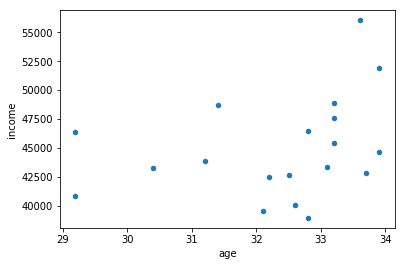

In [35]:
contents.plot.scatter(x='age', y='income')

## Clustering

In [36]:
contents.drop(['ward'], axis=1, inplace=True)
contents.head()

,age,income
0,33.2,48860.0
1,29.2,46380.0
2,32.1,39570.0
3,33.6,56050.0
4,32.8,46500.0


In [40]:
model = KMeans(n_clusters=5)
model.fit(scale(contents))

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=5, n_init=10, n_jobs=None, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [42]:
contents['clusters'] = model.labels_

In [43]:
contents.head()

,age,income,clusters
0,33.2,48860.0,4
1,29.2,46380.0,2
2,32.1,39570.0,0
3,33.6,56050.0,1
4,32.8,46500.0,4


## Visualise clusters

In [47]:
groups = contents.groupby('clusters')
groups

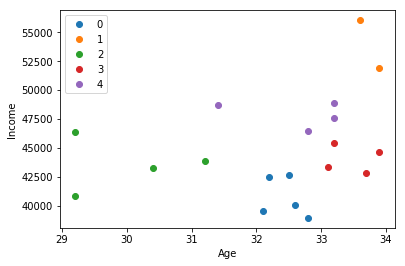

In [54]:
fix, ax = plt.subplots()
for name, group in groups:
    ax.plot(group.age, group.income, marker='o', linestyle='', label=name)
    
plt.xlabel('Age')
plt.ylabel('Income')
ax.legend()

## Fine tuning k-means

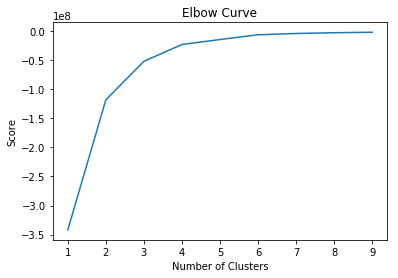

In [55]:
# WSS elbow test

# First specify what will go on our X and Y axes
X = contents[['age']]
Y = contents[['income']]

# 
Nc = range(1, 10)
kmeans = [KMeans(n_clusters=i) for i in Nc]
score = [kmeans[i].fit(Y).score(Y) for i in range(len(kmeans))]
plt.plot(Nc,score)
plt.xlabel('Number of Clusters')
plt.ylabel('Score')
plt.title('Elbow Curve')
plt.show()